Movie Review Analysis 

In this project, I will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment.

In [1]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\俊俊\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB_Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Positive reviews:

In [6]:
for i in range (0,2):
  print("Positive Review:",i+1)
  print(df[df['sentiment']=='positive']['review'].iloc[i])


Positive Review: 1
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the sho

Negative reviews:

In [7]:
for i in range (0,2):
  print("Negative Review:",i+1)
  print(df[df['sentiment']=='negative']['review'].iloc[i])

Negative Review: 1
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
Negative Review: 2
This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's

In [8]:
'''
PROVIDE YOUR ANSWER BELOW

Data Quality:

--- Positive Reviews:

The positive reviews generally provide specific details about what the reviewer liked about the movie or show.
They often contain descriptions of acting, plot, and production quality.
Positive Review 1, for example, highlights the brutal and unflinching nature of the show "Oz"
and how it appeals to viewers who appreciate its gritty realism.

--- Negative Reviews:

The negative reviews also offer specific criticisms of the movies or shows.
They often mention aspects like pacing, plot coherence, or decline in quality over time.
Negative Review 1, for instance, criticizes the inconsistency between the thriller and drama elements in a movie
and expresses disappointment with its execution.

Challenge:

Reviews vary in length and complexity, making automated sentiment analysis challenging.
Some reviews are concise, while others are longer and more detailed. Parsing such varied lengths consistently can be difficult.
For example, the Positive Review 1 is much longer than 2 others.


'''


'\nPROVIDE YOUR ANSWER BELOW\n\nData Quality:\n\n--- Positive Reviews:\n\nThe positive reviews generally provide specific details about what the reviewer liked about the movie or show.\nThey often contain descriptions of acting, plot, and production quality.\nPositive Review 1, for example, highlights the brutal and unflinching nature of the show "Oz"\nand how it appeals to viewers who appreciate its gritty realism.\n\n--- Negative Reviews:\n\nThe negative reviews also offer specific criticisms of the movies or shows.\nThey often mention aspects like pacing, plot coherence, or decline in quality over time.\nNegative Review 1, for instance, criticizes the inconsistency between the thriller and drama elements in a movie\nand expresses disappointment with its execution.\n\nChallenge:\n\nReviews vary in length and complexity, making automated sentiment analysis challenging.\nSome reviews are concise, while others are longer and more detailed. Parsing such varied lengths consistently can be

In [9]:
n=[]
for i in range(len(X)):
    n.append(len(X[i]))
avg =  np.mean(n)
longest = np.max(n)
shortest = np.min(n)

print("Average character length of review:",avg)

print("Length of the longest review:",longest)

print("Length of the shortest review:",shortest)

Average character length of review: 1309.43102
Length of the longest review: 13704
Length of the shortest review: 32


In [10]:
# The number of positive reviews and negative reviews

positive_reviews = (y == 'positive').sum()
negative_reviews = (y == 'negative').sum()

print("Number of positive reviews:",positive_reviews)

print("Number of negative reviews:",negative_reviews)

Number of positive reviews: 25000
Number of negative reviews: 25000


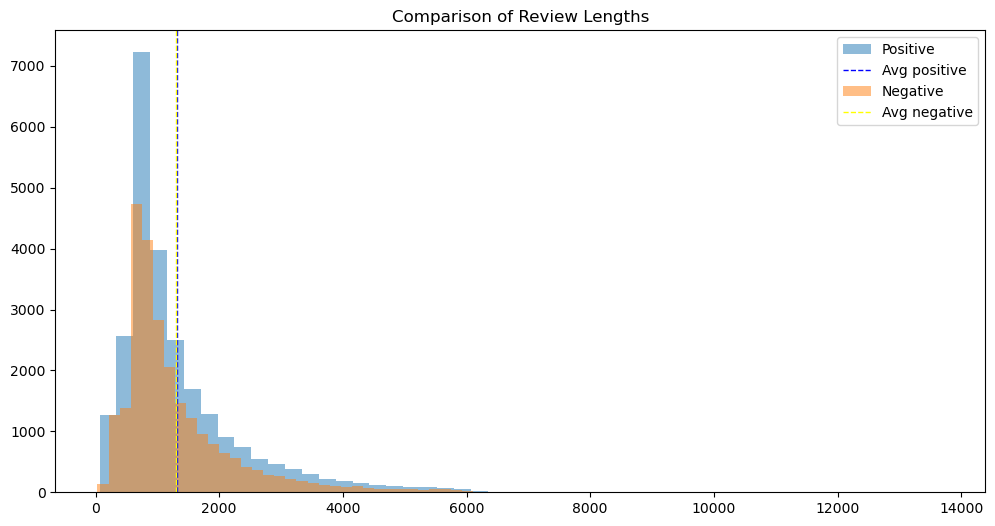

In [11]:
# Generate a histogram to compare the average character length for positive and negative reviews.

positive_lengths=[]
negative_lengths=[]
for i in range(len(X)):
    if y[i]=='positive':
        positive_lengths.append(len(X[i]))
    elif y[i]=='negative':
        negative_lengths.append(len(X[i]))

avg_positive_length = np.mean(positive_lengths)
avg_negative_length = np.mean(negative_lengths)

plt.figure(figsize=(12, 6))
plt.hist(positive_lengths, alpha=0.5, bins=50, label='Positive')
plt.axvline(avg_positive_length, color='blue', linestyle='dashed', linewidth=1, label='Avg positive')

plt.hist(negative_lengths, alpha=0.5, bins=50, label='Negative')
plt.axvline(avg_negative_length, color='yellow', linestyle='dashed', linewidth=1, label='Avg negative')

plt.legend()
plt.title('Comparison of Review Lengths')


plt.show()





average length of positive review: 1324.79768
average length of negative review: 1294.06436


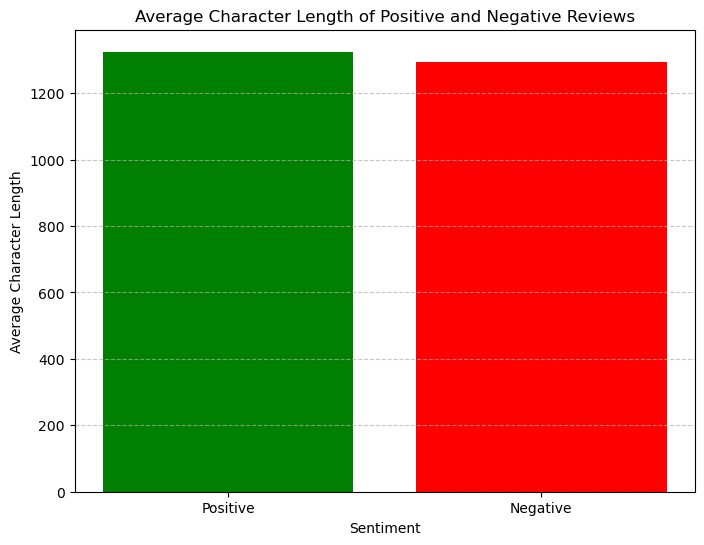

In [12]:
average_lengths = {'Positive': avg_positive_length, 'Negative': avg_negative_length}

print('average length of positive review:',avg_positive_length)
print('average length of negative review:',avg_negative_length)

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.bar(average_lengths.keys(), average_lengths.values(), color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Average Character Length')
plt.title('Average Character Length of Positive and Negative Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
'''
PROVIDE YOUR ANSWER BELOW

General observations :

Average character length of review: 1309.43102
Length of the longest review: 13704
Length of the shortest review: 32

Observations positive vs negative:

Number of positive reviews: 25000
Number of negative reviews: 25000

average length of positive review: 1324.79768
average length of negative review: 1294.06436

The dataset contains an equal number of positive (25000) and negative (25000) reviews.
This balance ensures that the model will be trained on an equal amount of data from both classes,
preventing bias towards either positive or negative sentiment.

Positive reviews have a slightly higher average length compared to negative reviews, but they are closed overall.
'''


'\nPROVIDE YOUR ANSWER BELOW\n\nGeneral observations :\n\nAverage character length of review: 1309.43102\nLength of the longest review: 13704\nLength of the shortest review: 32\n\nObservations positive vs negative:\n\nNumber of positive reviews: 25000\nNumber of negative reviews: 25000\n\naverage length of positive review: 1324.79768\naverage length of negative review: 1294.06436\n\nThe dataset contains an equal number of positive (25000) and negative (25000) reviews.\nThis balance ensures that the model will be trained on an equal amount of data from both classes,\npreventing bias towards either positive or negative sentiment.\n\nPositive reviews have a slightly higher average length compared to negative reviews, but they are closed overall.\n'

In [14]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [15]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1)
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english"))
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data):
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list)
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000]
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)}
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                                     if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return np.array(data_encoded, dtype=object), np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

In [16]:
'''
PROVIDE YOUR ANSWER BELOW

--- preprocess_string Function:

This function removes non-word characters (excluding numbers and letters), whitespace, and digits from the input string.
Necessary to clean the text data and remove irrelevant characters or symbols that might not contribute to sentiment analysis.
Clean text helps the model focus on meaningful words and patterns.

--- preprocess_sentence Function:

Tokenizes and preprocesses each sentence by converting it to lowercase and applying the preprocess_string function.
Removes stopwords (commonly occurring words like "the", "is", "and", etc.) from the sentence.
Necessary to remove noise from the text data and reduce dimensionality. Stopwords usually do not carry much sentiment information and can be safely ignored.

-- get_stoi Function:

Collects all words from the dataset after preprocessing and creates a Counter object to count their occurrences.
Filters out the top 1000 most common words.
Creates a dictionary (stoi: string to index) mapping each word to a unique integer index.
Necessary for numerical representation of words in the LSTM model.
It converts words into indices, allowing the model to process text data as numerical input. Limiting the vocabulary size to the top frequent words helps in reducing computational complexity and memory usage.

--- tokenize Function:

Encodes the preprocessed data into numerical format using the stoi mapping.
Converts sentiment labels ('positive' and 'negative') into binary labels (1 for positive, 0 for negative).
Necessary to convert text data and labels into a format suitable for training the LSTM model.
Numerical encoding allows the model to process the data effectively.

--- padding_ Function:

Pads the encoded sequences to ensure uniform length (seq_len) for input into the LSTM model.
Necessary because LSTM models require inputs of uniform length. Padding ensures that all sequences have the same length,
allowing them to be processed in batch efficiently.





'''


'\nPROVIDE YOUR ANSWER BELOW\n\n--- preprocess_string Function:\n\nThis function removes non-word characters (excluding numbers and letters), whitespace, and digits from the input string.\nNecessary to clean the text data and remove irrelevant characters or symbols that might not contribute to sentiment analysis.\nClean text helps the model focus on meaningful words and patterns.\n\n--- preprocess_sentence Function:\n\nTokenizes and preprocesses each sentence by converting it to lowercase and applying the preprocess_string function.\nRemoves stopwords (commonly occurring words like "the", "is", "and", etc.) from the sentence.\nNecessary to remove noise from the text data and reduce dimensionality. Stopwords usually do not carry much sentiment information and can be safely ignored.\n\n-- get_stoi Function:\n\nCollects all words from the dataset after preprocessing and creates a Counter object to count their occurrences.\nFilters out the top 1000 most common words.\nCreates a dictionary 

In [17]:
X = df['review']
y = df['sentiment']

# Split the dataset into train, valid, and test. Use a 60-20-20 split.

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


# Set the padding of the reviews to 500.

seq_len = 500

In [18]:
# Preprocess training data
stoi_train = get_stoi(X_train)
X_train_encoding, y_train_encoding = tokenize(X_train, y_train, stoi_train)
X_train_padding = padding_(X_train_encoding, seq_len)

# Preprocess validation data
X_val_encoding, y_val_encoding = tokenize(X_val, y_val, stoi_train)
X_val_padding = padding_(X_val_encoding, seq_len)

# Preprocess test data
X_test_encoding, y_test_encoding = tokenize(X_test, y_test, stoi_train)
X_test_padding = padding_(X_test_encoding, seq_len)


<built-in method get of Counter object at 0x00000224924A2080>


In [19]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_padding)
y_train_tensor = torch.tensor(y_train_encoding)
X_val_tensor = torch.tensor(X_val_padding)
y_val_tensor = torch.tensor(y_val_encoding)
X_test_tensor = torch.tensor(X_test_padding)
y_test_tensor = torch.tensor(y_test_encoding)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [20]:
# Verify DataLoader

for train_batch_features, batch_labels in train_loader:
    print("Train Batch Features Shape:", train_batch_features.shape)
    print("Batch Labels Shape:", batch_labels.shape)
    break


for valid_batch_features, batch_labels in valid_loader:
    print("Valid Batch Features Shape:", valid_batch_features.shape)
    print("Batch Labels Shape:", batch_labels.shape)
    break

Train Batch Features Shape: torch.Size([16, 500])
Batch Labels Shape: torch.Size([16])
Valid Batch Features Shape: torch.Size([16, 500])
Batch Labels Shape: torch.Size([16])


In [21]:

class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, input_size, hidden_size, num_classes):
        super(SentimentRNN, self).__init__()
        self.name='SentimentRNN'
        self.emb = nn.Embedding(vocab_size, input_size)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)



    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state and cell state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the LSTM
        out, _ = self.rnn(x, (h0, c0))
        # concatenate the max-pooling and average-pooling
        max_pool = torch.max(out, dim=1)[0]
        avg_pool = torch.mean(out, dim=1)
        pooled_out = torch.cat([max_pool, avg_pool], dim=1)
        out = self.fc(pooled_out)
        out = torch.sigmoid(out)
        return out

vocab_size = len(stoi_train) + 1

model = SentimentRNN(vocab_size, 50, 50, 2)





In [22]:
def get_accuracy(model, data):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    correct, total = 0, 0
    for features, labels in data:
        output = model(features)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total




In [23]:
import time

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt

def train_rnn_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5):
    criterion = nn.BCELoss()  # as it is a binary classification
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train_losses, valid_losses, train_acc, valid_acc = [], [], [], []
    epochs = []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        for tweets, labels in train_loader:
            labels = labels.long()  # Ensure labels are of integer type
            optimizer.zero_grad()
            pred = model(tweets)
            labels_one_hot = F.one_hot(labels, num_classes=2).float()
            train_loss = criterion(pred, labels_one_hot)
            train_loss.backward()
            optimizer.step()
        train_losses.append(float(train_loss))

        model.eval()
        with torch.no_grad():
            for tweets, labels in valid_loader:
                labels = labels.long()  # Ensure labels are of integer type
                pred = model(tweets)
                labels_one_hot = F.one_hot(labels, num_classes=2).float()
                valid_loss = criterion(pred, labels_one_hot)
            valid_losses.append(float(valid_loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        print("Epoch %d; Train Loss %f; Val Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, train_loss, valid_loss, train_acc[-1], valid_acc[-1]))

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # plotting
    plt.title("Training Curve")
    plt.plot(train_losses, label="Train")
    plt.plot(valid_losses, label="Valid")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

def get_accuracy(model, data_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for tweets, labels in data_loader:
            pred = model(tweets)
            _, predicted = torch.max(pred, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy


Epoch 1; Train Loss 0.696801; Val Loss 0.690497; Train Acc 0.556167; Val Acc 0.550100
Epoch 2; Train Loss 0.688838; Val Loss 0.689317; Train Acc 0.594067; Val Acc 0.587500
Epoch 3; Train Loss 0.684295; Val Loss 0.687031; Train Acc 0.623400; Val Acc 0.614300
Epoch 4; Train Loss 0.677058; Val Loss 0.685658; Train Acc 0.638067; Val Acc 0.636300
Epoch 5; Train Loss 0.678633; Val Loss 0.682205; Train Acc 0.654700; Val Acc 0.644500
Finished Training
Total time elapsed: 292.36 seconds


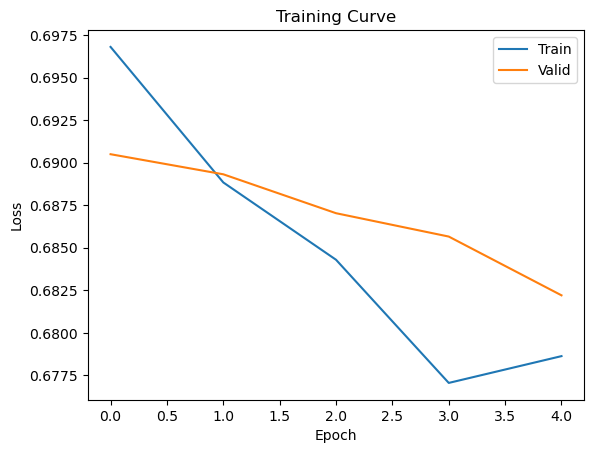

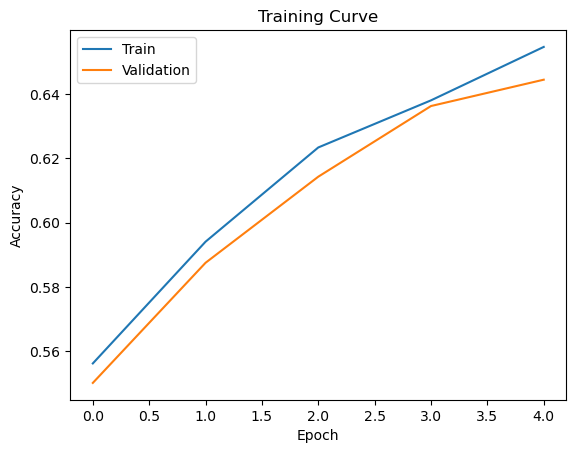

In [27]:
vocab_size = len(stoi_train) + 1
model = SentimentRNN(vocab_size, 50, 50, 2)
train_rnn_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5)

1. Change learning rate

Epoch 1; Train Loss 0.228553; Val Loss 0.416285; Train Acc 0.852300; Val Acc 0.839100
Epoch 2; Train Loss 0.134986; Val Loss 0.324357; Train Acc 0.875567; Val Acc 0.856000
Epoch 3; Train Loss 0.286877; Val Loss 0.348108; Train Acc 0.886133; Val Acc 0.856100
Epoch 4; Train Loss 0.333883; Val Loss 0.332829; Train Acc 0.905167; Val Acc 0.858800
Epoch 5; Train Loss 0.151592; Val Loss 0.352119; Train Acc 0.916500; Val Acc 0.856000
Finished Training
Total time elapsed: 289.13 seconds


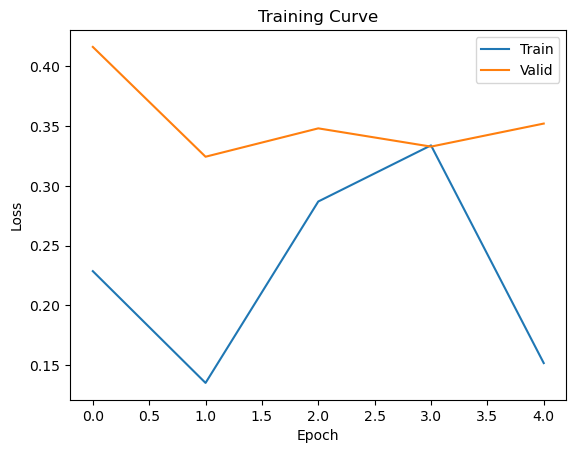

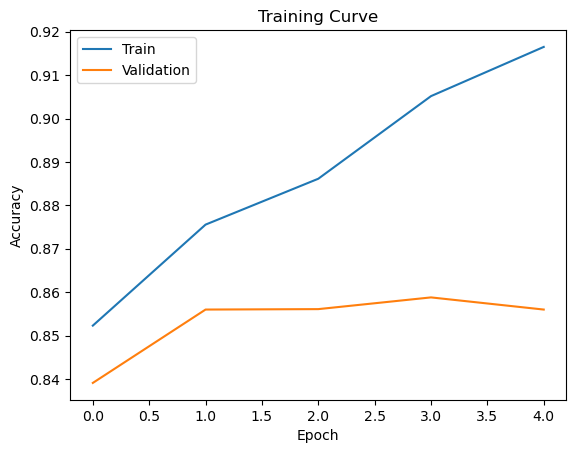

In [32]:
# change lr to 1e-3
vocab_size = len(stoi_train) + 1
model = SentimentRNN(vocab_size, 50, 50, 2)
train_rnn_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-3)



2. Increase the hidden size

Epoch 1; Train Loss 0.433796; Val Loss 0.453445; Train Acc 0.846833; Val Acc 0.834200
Epoch 2; Train Loss 0.176585; Val Loss 0.540334; Train Acc 0.873400; Val Acc 0.850900
Epoch 3; Train Loss 0.135956; Val Loss 0.568890; Train Acc 0.890333; Val Acc 0.854700
Epoch 4; Train Loss 0.359952; Val Loss 0.493067; Train Acc 0.909600; Val Acc 0.857800
Epoch 5; Train Loss 0.257248; Val Loss 0.453438; Train Acc 0.926000; Val Acc 0.855500
Finished Training
Total time elapsed: 424.38 seconds


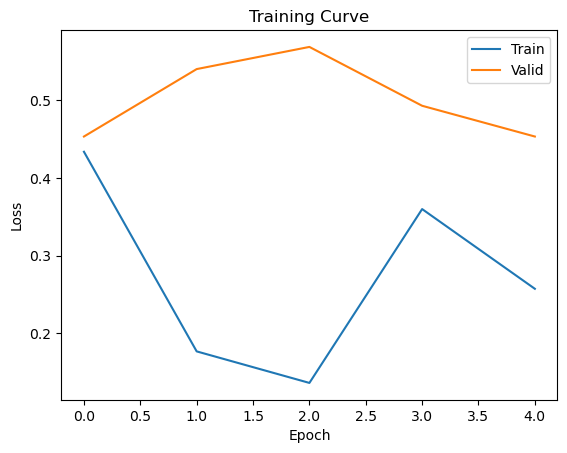

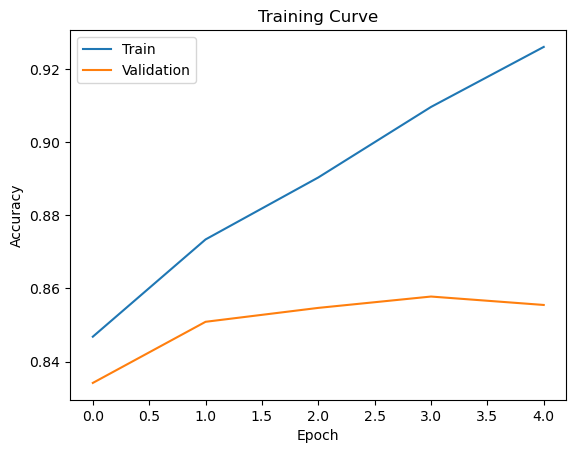

In [33]:
# change hidden size to 80
vocab_size = len(stoi_train) + 1
model = SentimentRNN(vocab_size, 50, 80, 2)
train_rnn_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-3)

3. Increase the input size

Epoch 1; Train Loss 0.455496; Val Loss 0.333733; Train Acc 0.859900; Val Acc 0.845700
Epoch 2; Train Loss 0.249943; Val Loss 0.349661; Train Acc 0.885467; Val Acc 0.856600
Epoch 3; Train Loss 0.314251; Val Loss 0.286499; Train Acc 0.905633; Val Acc 0.859500
Epoch 4; Train Loss 0.131506; Val Loss 0.357877; Train Acc 0.924933; Val Acc 0.858000
Epoch 5; Train Loss 0.138139; Val Loss 0.362513; Train Acc 0.940767; Val Acc 0.859700
Finished Training
Total time elapsed: 586.26 seconds


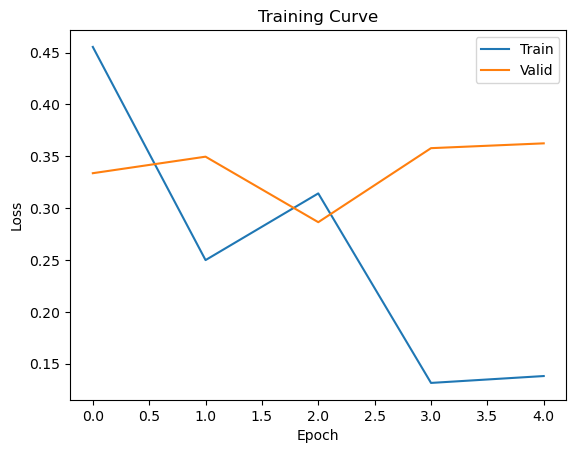

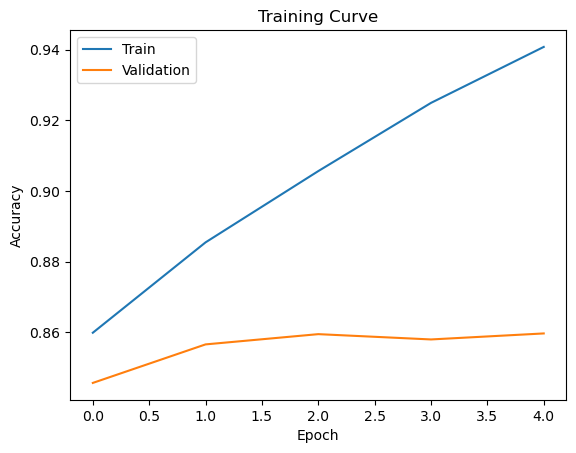

In [34]:
# change input size to 60
vocab_size = len(stoi_train) + 1
model = SentimentRNN(vocab_size, 60, 100, 2)
train_rnn_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-3)

4. Increase epochs

Epoch 1; Train Loss 0.300079; Val Loss 0.458353; Train Acc 0.848767; Val Acc 0.838200
Epoch 2; Train Loss 0.414583; Val Loss 0.416421; Train Acc 0.874567; Val Acc 0.854000
Epoch 3; Train Loss 0.124744; Val Loss 0.405448; Train Acc 0.887000; Val Acc 0.853200
Epoch 4; Train Loss 0.129641; Val Loss 0.429514; Train Acc 0.899000; Val Acc 0.851800
Epoch 5; Train Loss 0.300323; Val Loss 0.387855; Train Acc 0.912667; Val Acc 0.853300
Epoch 6; Train Loss 0.089393; Val Loss 0.393478; Train Acc 0.922867; Val Acc 0.851300
Epoch 7; Train Loss 0.146675; Val Loss 0.401001; Train Acc 0.938500; Val Acc 0.853000
Epoch 8; Train Loss 0.063907; Val Loss 0.367942; Train Acc 0.953533; Val Acc 0.852900
Epoch 9; Train Loss 0.053927; Val Loss 0.519024; Train Acc 0.959800; Val Acc 0.850500
Epoch 10; Train Loss 0.096013; Val Loss 0.515031; Train Acc 0.968933; Val Acc 0.847200
Finished Training
Total time elapsed: 562.82 seconds


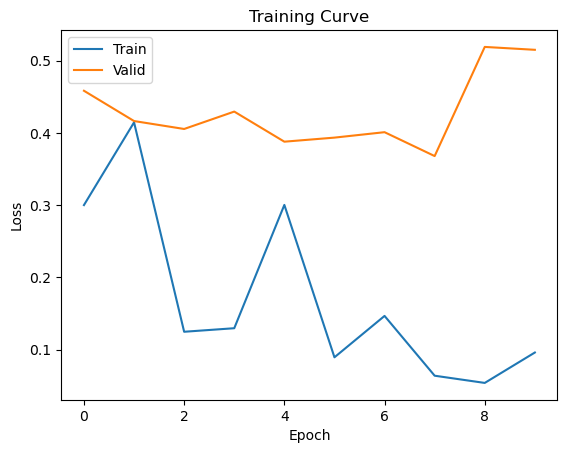

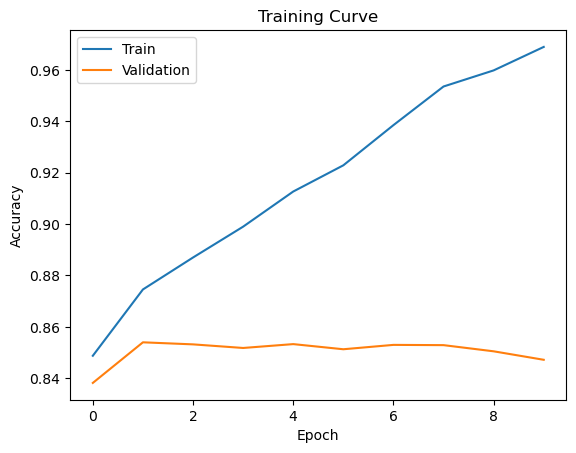

In [35]:
# change num_epochs to 10
vocab_size = len(stoi_train) + 1
model = SentimentRNN(vocab_size, 50, 50, 2)
train_rnn_network(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-3)

In [37]:
vocab_size = len(stoi_train) + 1
best_model = SentimentRNN(vocab_size, 60, 100, 2)
test_accuracy = get_accuracy(model, test_loader)
print("Test accuracy of the best model is:",test_accuracy)




Test accuracy of the best model is: 0.8427


In [39]:
x_test= test_dataset

i=0
for reviews, labels in test_loader:

    output = model(reviews)
    # print(reviews)
    pred = output.max(1, keepdim=True)[1]
    tensorr=pred.eq(labels.view_as(pred))
    ind=torch.where(tensorr == False)[0]
    for ele in ind.tolist():
      print(x_test[ele+i])
      print("True label:",labels[ele])
      print("Prediction:",pred[ele])
      if i == 5:
        break
      i+=1




(tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

In [41]:
import torch

# Ensure the model is in evaluation mode
model.eval()

# Dictionary to store misclassified examples
misclassified_examples = {"positive": [], "negative": []}

# Iterate through the test dataset
for inputs, labels in test_loader:
    # Forward pass
    with torch.no_grad():
        outputs = model(inputs)

    # Convert outputs to probabilities using softmax
    probabilities = torch.softmax(outputs, dim=1)

    # Get predicted labels
    predicted_labels = torch.argmax(probabilities, dim=1)

    # Identify misclassified samples
    misclassified_indices = (predicted_labels != labels).nonzero(as_tuple=True)[0]

    # Gather misclassified examples
    if misclassified_indices.numel() > 0:  # Ensure there are misclassified samples
        for idx in misclassified_indices:
            # Decode the input text
            input_text = " ".join([list(stoi_train.keys())[i - 1] for i in inputs[idx].cpu().numpy() if i != 0])  # Assuming stoi_train is available

            # Get true and predicted labels
            true_label = labels[idx].item()
            predicted_label = predicted_labels[idx].item()

            # Append the example to the appropriate list based on its true label
            if true_label == 1:  # Positive review
                misclassified_examples["positive"].append((input_text, true_label, predicted_label))
            else:  # Negative review
                misclassified_examples["negative"].append((input_text, true_label, predicted_label))

# Print up to 5 examples of misclassified positive and negative reviews
print("Misclassified positive reviews:")
for i, example in enumerate(misclassified_examples["positive"][:5]):
    print(f"Example {i + 1}:")
    print("Review:", example[0])
    print("True Label:", "Positive")
    print("Predicted Label:", "Negative" if example[2] == 0 else "Positive")
    print()

print("Misclassified negative reviews:")
for i, example in enumerate(misclassified_examples["negative"][:5]):
    print(f"Example {i + 1}:")
    print("Review:", example[0])
    print("True Label:", "Negative")
    print("Predicted Label:", "Negative" if example[2] == 0 else "Positive")
    print()


Misclassified positive reviews:
Example 1:
Review: movie piece br br br br film working company really creepy always gets killed horrible inside body br br rest movie goes romance trying wife played tries old life like scene br rest movie things trying evil evil turn br br film previous movies like day earth still free like br br except movies production br br stars film cheap role much br br scifi horror b movie stars film
True Label: Positive
Predicted Label: Negative

Example 2:
Review: watching film new watched film lead actor put performance almost isnt say performances give lines actor jack title living possibly attempt make class maybe even well doesnt really matter film lines film director seems realize serious scifi works budget best take seriously said everyone involved film great fun film earth dark ends quality film making perfect could film hands
True Label: Positive
Predicted Label: Negative

Example 3:
Review: released new world video br based horror film group young fri